# plot-single-model-vs-ensemble
8.12.24

For the ablation study, plot the test errors of various ensembles of Lupine models fit to the full joint quantifications matrix. 

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# plotting templates
sns.set(context="talk", style="ticks") 
sns.set_palette("tab10")

#### Generate plotting dataframe

In [20]:
plotter = pd.DataFrame(columns=["n_models", "test_error1", "test_error2", 
                                "test_error3", "test_error4"])

plotter["n_models"] = 1,2,4,6,8,10,12,16,32,42

plotter["test_error1"] = [0.051, 0.035, 0.031, 0.029, 0.028, 0.028, 0.028, 0.028, 0.028, 0.027]
plotter["test_error2"] = [0.047, 0.036, 0.031, 0.031, 0.031, 0.03, 0.03, 0.029, 0.027, 0.027]
plotter["test_error3"] = [0.051, 0.039, 0.033, 0.032, 0.03, 0.029, 0.029, 0.028, 0.027, 0.027]
plotter["test_error4"] = [0.042, 0.035, 0.03, 0.029, 0.028, 0.028, 0.027, 0.027, 0.027, 0.027]

#### We may need to melt

In [21]:
plotter_melt = plotter.melt(id_vars="n_models")
plotter_melt.columns = ["n_models", "set", "error"]
#plotter_melt

#### Plot! 

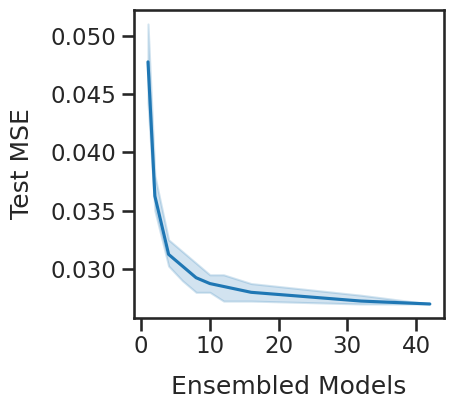

In [43]:
pal = ["#1f77b4", "#ff7f0e", "#9467bd"]

plt.figure(figsize=(4,4))

sns.lineplot(data=plotter_melt, x="n_models", y="error", color="#1f77b4")

plt.xlabel("Ensembled Models", labelpad=12, size=18)
plt.ylabel("Test MSE", labelpad=12, size=18)

plt.locator_params(axis='x', nbins=5)

plt.show()
#plt.savefig("../figures/test-error-vs-nmodels.pdf", bbox_inches="tight")

---
## Identify the percentage increases
Of ensembling various numbers of models. 

#### Get a new dataframe with the per-model means

In [23]:
n_models = plotter["n_models"]
plotter = plotter.drop(columns=["n_models"])

ensemble_means = np.array(plotter.mean(axis=1))

df_means = pd.DataFrame(columns=["n_models", "mean_mse"])
df_means["n_models"] = n_models
df_means["mean_mse"] = ensemble_means

#### What is the % difference between a single model and ensembling 10? 

In [34]:
mse_1 = df_means[df_means["n_models"] == 1]["mean_mse"].item()
mse_10 = df_means[df_means["n_models"] == 10]["mean_mse"].item()

diff = mse_1 - mse_10
diff / mse_1

0.3979057591623037

#### How about between 10 models and 40?

In [38]:
mse_10 = df_means[df_means["n_models"] == 10]["mean_mse"].item()
mse_40 = df_means[df_means["n_models"] == 42]["mean_mse"].item()

diff = mse_10 - mse_40
diff / mse_10

0.060869565217391244